In [42]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 2 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [43]:
# =================================================-
#### Slide 3: Loading packages  ####

import pickle
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics

In [44]:
main_dir = Path.home() / "maptv" / "Classification-with-Python"

In [45]:
main_dir / "data"

PosixPath('/Users/maptv/maptv/Classification-with-Python/data')

In [46]:
main_dir = Path.cwd().parent
data_dir = main_dir / "data"

In [60]:
# =================================================-
#### Slide 4: Load data into Python  ####

df = pd.read_csv(data_dir / "healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [61]:
# =================================================-
#### Slide 5: Subset data  ####

# df = df.drop(columns="bmi")
# df.head()

In [62]:
# =================================================-
#### Slide 6: Convert target to binary  ####

df["stroke"].unique()

array([1, 0])

In [63]:
# =================================================-
#### Slide 9: The data at first glance  ####

# The first 3 rows.
df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [64]:
# The data types.
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

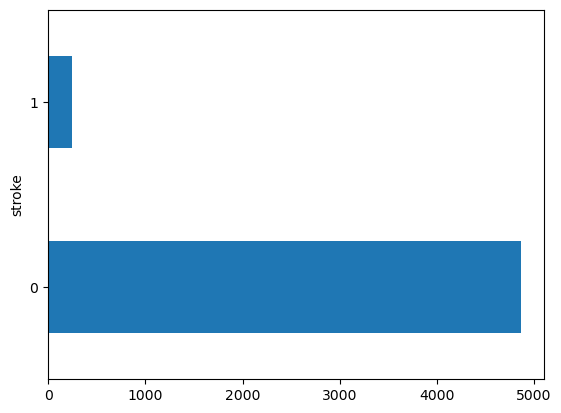

In [65]:
df["stroke"].value_counts().plot.barh();

In [66]:
df["stroke"].value_counts(normalize=True)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [68]:
# =================================================-
#### Slide 10: Data prep: check for NAs  ####

# Check for NAs.
df.isna().sum()

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [69]:
# =================================================-
#### Slide 11: Data prep: check for NAs  ####

percent_missing = df.isna().mean() * 100
percent_missing

id                    0.000000
gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.933464
smoking_status       30.215264
stroke                0.000000
dtype: float64

In [70]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [71]:
df["smoking_status"]

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109                NaN
Name: smoking_status, Length: 5110, dtype: object

In [77]:
df = df.set_index("id")

In [78]:
dummy_df = pd.get_dummies(df, columns=df.select_dtypes("object").columns)
dummy_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0,1,228.69,36.6,1,False,True,False,False,...,False,False,True,False,False,False,True,True,False,False
51676,61.0,0,0,202.21,NaN,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
31112,80.0,0,1,105.92,32.5,1,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
60182,49.0,0,0,171.23,34.4,1,True,False,False,False,...,False,False,True,False,False,False,True,False,False,True
1665,79.0,1,0,174.12,24.0,1,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1,0,83.75,NaN,0,True,False,False,False,...,False,False,True,False,False,False,True,False,True,False
44873,81.0,0,0,125.20,40.0,0,True,False,False,False,...,False,False,False,True,False,False,True,False,True,False
19723,35.0,0,0,82.99,30.6,0,True,False,False,False,...,False,False,False,True,False,True,False,False,True,False


In [84]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
dummy_df = pd.DataFrame(imputer.fit_transform(dummy_df), columns=dummy_df.columns, index=df.index)

In [85]:
dummy_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,,,,
9046,67.0,0.0,1.0,228.69,36.60,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
51676,61.0,0.0,0.0,202.21,32.56,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31112,80.0,0.0,1.0,105.92,32.50,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
60182,49.0,0.0,0.0,171.23,34.40,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1665,79.0,1.0,0.0,174.12,24.00,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18234,80.0,1.0,0.0,83.75,27.84,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
44873,81.0,0.0,0.0,125.20,40.00,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
19723,35.0,0.0,0.0,82.99,30.60,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [86]:
df.loc[1665]

gender                      Female
age                           79.0
hypertension                     1
heart_disease                    0
ever_married                   Yes
work_type            Self-employed
Residence_type               Rural
avg_glucose_level           174.12
bmi                           24.0
smoking_status        never smoked
stroke                           1
Name: 1665, dtype: object

In [87]:
# =================================================-
#### Slide 12: Data prep: check for NAs  ####

dummy_df.isna().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [88]:
# =================================================-
#### Slide 13: Data prep: ready for kNN  ####

df["stroke"].dtypes

dtype('int64')

In [92]:
# Split the data into X and y
X = dummy_df.drop(columns="stroke")
y = dummy_df["stroke"]

In [93]:
# =================================================-
#### Slide 14: Data prep: numeric variables  ####


In [94]:
# =================================================-
#### Slide 20: Train and test: small scale before n-fold  ####

# Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [95]:
# =================================================-
#### Slide 22: Data prep: scaling variables  ####

# Scale X.
X_train = scale(X_train)
X_test = scale(X_test)
print(X_train[0:2])
print(X_test[0:2])


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

[[ 0.60884288 -0.33037446 -0.23816135  0.63825752  0.00806396 -1.17402064
   1.17402064  0.         -0.71900176  0.71900176 -0.38367923 -0.06910341
   0.86404979 -0.43810503 -0.3922639  -0.99414629  0.99414629 -0.46102318
  -0.76337629 -0.42534432]
 [-1.88698872 -0.33037446 -0.23816135 -0.38666334 -1.75598427  0.85177378
  -0.85177378  0.          1.39081718 -1.39081718 -0.38367923 -0.06910341
  -1.15734072 -0.43810503  2.54930418  1.00588818 -1.00588818 -0.46102318
  -0.76337629 -0.42534432]]
[[-0.04508466 -0.32444284 -0.24077171  0.12994683  1.07727971  0.8151657
  -0.81405762 -0.02554881 -0.73532545  0.73532545  2.59661785 -0.0572036
  -1.1562397  -0.43401854 -0.39840954  1.04061541 -1.04061541  2.22302957
  -0.77473142 -0.43189409]
 [ 1.52709552 -0.32444284 -0.24077171 -0.64601991  0.17562414  0.8151657
  -0.81405762 -0.02554881 -0.73532545  0.73532545 -0.38511635 -0.0572036
   0.86487257 -0.43401854 -0.39840954 -0.96096982  0.96096982  2.22302957
  -0.77473142 -0.43189409]]


In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [ ]:
# =================================================-
#### Slide 5: kNN: build model  ####

# Create kNN classifier.
default = 5
kNN = KNeighborsClassifier(n_neighbors=default)
# Fit the classifier to the data.
kNN.fit(X_train, y_train)

In [ ]:
# =================================================-
#### Slide 6: kNN: predict on a test set  ####

predictions = kNN.predict(X_test)
print(predictions[0:5])

In [ ]:
# =================================================-
#### Slide 7: kNN: predict on test  ####

actual_v_predicted = np.column_stack((y_test, predictions))
print(actual_v_predicted[0:5])

In [ ]:
# =================================================-
#### Slide 18: Confusion matrix in python  ####

# Confusion matrix for kNN.
cm_kNN = confusion_matrix(y_test, predictions)
print(cm_kNN)
print(round(accuracy_score(y_test, predictions), 4))

In [ ]:
# =================================================-
#### Slide 19: Confusion matrix: visualize  ####

plt.imshow(cm_kNN, interpolation="nearest", cmap=plt.cm.Wistia)
classNames = ["Negative", "Positive"]
plt.title("Confusion Matrix - Test Data")
plt.ylabel("True label")
plt.xlabel("Predicted label")
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [["TN", "FP"], ["FN", "TP"]]
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + " = " + str(cm_kNN[i][j]))
plt.show()

In [ ]:
# =================================================-
#### Slide 20: Evaluation of kNN with k neighbors  ####

# Create a dictionary with accuracy values for our kNN model with k.
model_final_dict = {
    "metrics": ["accuracy"],
    "values": [round(accuracy_score(y_test, predictions), 4)],
    "model": ["kNN_k"],
}
model_final = pd.DataFrame(data=model_final_dict)
print(model_final)

In [ ]:
# =================================================-
#### Slide 24: Plot ROC and calculate AUC  ####

# Store FPR, TPR, and threshold as variables.
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
# Store the AUC.
roc_auc = metrics.auc(fpr, tpr)
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 4 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [ ]:
# =================================================-
#### Slide 6: Cross-validation pipeline for optimal accuracy  ####

# Create a pipeline of the scaler and Estimator
cv_pipeline = Pipeline([("transformer", StandardScaler()), ("estimator", kNN)])

In [ ]:
# =================================================-
#### Slide 7: Cross-validation for optimal accuracy  ####

# Calculate cv scores
cv_scores = cross_val_score(cv_pipeline, X, y, cv=5)

In [ ]:
# =================================================-
#### Slide 8: Cross-validation for optimal accuracy  ####

# Print each cv score (accuracy) and average them.
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))
mean = np.mean(cv_scores)
print("Optimal cv score is:", round(mean, 4))


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################

In [ ]:
#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 1 INTROTOCLASSIFICATION/KNN/INTROTOCLASSIFICATION KNN 5 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs

In [ ]:
# =================================================-
#### Slide 5: Finding optimal k - GridSearchCV  ####

# Define the parameter values that should be searched.
k_range = list(range(1, 31))

# Create a parameter grid: map the parameter names to the values that should be searched by building a Python dictionary.
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

# Instantiate the grid using our original model - kNN with k.
grid = GridSearchCV(kNN, param_grid, cv=10, scoring="accuracy")

In [ ]:
# =================================================-
#### Slide 6: Finding optimal k - GridSearchCV  ####

# Create a pipeline of the scaler and gridsearch
grid_search_pipeline = Pipeline(
    [("transformer", StandardScaler()), ("estimator", grid)]
)

# Fit Gridsearch pipeline
grid_search_pipeline.fit(X, y)

In [ ]:
# =================================================-
#### Slide 7: Finding optimal k - view results  ####

# View the complete results (list of named tuples).
print(grid.cv_results_["mean_test_score"])

In [ ]:
# =================================================-
#### Slide 8: Finding optimal k  ####

# Create a list of the mean scores only by using a list comprehension to loop through grid.cv_results_.
grid_mean_scores = [result for result in grid.cv_results_["mean_test_score"]]
print(grid_mean_scores)

In [ ]:
# =================================================-
#### Slide 9: Finding optimal k - plot  ####

# Plot the results.
_ = plt.plot(k_range, grid_mean_scores)
_ = plt.xlabel("Value of K for kNN")
_ = plt.ylabel("Cross-Validated Accuracy")
plt.show()

In [ ]:
# =================================================-
#### Slide 10: Define and examine the optimized model   ####

# Single best score achieved across all params (k).
print(grid.best_score_)
grid_score = grid.best_score_

# Dictionary containing the parameters (k) used to generate that score.
print(grid.best_params_)

# Actual model object fit with those best parameters.
# Shows default parameters that we did not specify.
print(grid.best_estimator_)

In [ ]:
# =================================================-
#### Slide 11: Add GridSearchCV score to the final scores  ####

model_final = model_final.append(
    {
        "metrics": "accuracy",
        "values": round(grid_score, 4),
        "model": "kNN_GridSearchCV",
    },
    ignore_index=True,
)
print(model_final)

In [ ]:
# =================================================-
#### Slide 12: Optimal model and final thoughts  ####

kNN_best = grid.best_estimator_

# Check accuracy of our model on the test data.
print(kNN_best.score(X_test, y_test))
kNN_champ = kNN_best.score(X_test, y_test)

In [ ]:
# =================================================-
#### Slide 14: Final Model   ####

# Save this final model
model_final = {
    "metrics": "accuracy",
    "values": round(kNN_champ, 4),
    "model": "kNN_optimized",
}
print(model_final)
pickle.dump(model_final, open(str(data_dir) + "/" + "model_final.sav", "wb"))

In [ ]:
# =================================================-
#### Slide 18: Exercise  ####


#######################################################
####  CONGRATULATIONS ON COMPLETING THIS MODULE!   ####
#######################################################